# PCA notes

Scenario: think about we have 2 sets of genes data about rabbits.

| | sample 1 | sample 2 | sample 3 | sample 4 | sample 5 | sample 6 |
|--|--|--|--|--|--|--|
|Gene1|10|11|8|3|2|1|
|Gene2|6|4|5|3|2.8|1|

Questions: we need to figure out which are the data of a group.

First, let us plot them in a 2D graph, where the mean point is at the origin.

Mean of the Gene1 = 5.83  
Mean of the Gene2 = 3.63

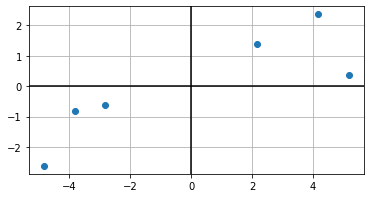

In [1]:
import matplotlib.pyplot as plt


gene1 = [10, 11, 8, 3, 2, 1]
gene2 = [6, 4, 5, 3, 2.8, 1]
mean_gene1 = 5.83
mean_gene2 = 3.63
gene1_shift = [i - mean_gene1 for i in gene1]
gene2_shift = [i - mean_gene2 for i in gene2]

fig, ax = plt.subplots()
ax.scatter(gene1_shift, gene2_shift, )
ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Then we can try to fit a line randomly.

y = 2x

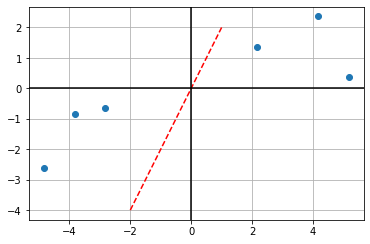

In [2]:
import numpy as np
random_line = np.arange(-2, 2)
y = [i*2 for i in random_line]

fig, ax = plt.subplots()
ax.scatter(gene1_shift, gene2_shift, )
ax.plot(random_line, y, '--' , color = 'r', )
ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

If we want to calculate the distance between the line and all the points, we will turn to Pythagorean theorem.

Here $$c^2 = a^2 + b^2$$  
Compare to calculate $b$, it is easier to calculate $c$. Then we can compute all the $c_1$ to $c_6$.  

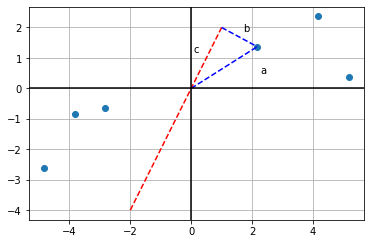

In [3]:
# Pythagorean theorem
ptb_x = [1, 2.17]
ptb_y = [2, 1.37]
pta_x = [0, 2.17]
pta_y = [0, 1.37]

fig, ax = plt.subplots()
ax.scatter(gene1_shift, gene2_shift, )
ax.plot(random_line, y, '--' , color = 'r', )
ax.plot(ptb_x, ptb_y,  '--' , color = 'b', )
ax.plot(pta_x, pta_y,  '--' , color = 'b', )
ax.set_aspect('equal')
ax.grid(True, which='both')

ax.text(0.7, 0.7, 'a', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
ax.text(0.65, 0.9, 'b', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
ax.text(0.5, 0.8, 'c', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

To fit a line, we need to minimize the sum of suqare distantce(SSD)  
$$SSD=c_1^2 +c_2^2+ +...+ c_5^2+c_6^2 $$

Assume we are now find that the slope of $PC1$ line equals to 0.25. We draw the line in the graph.  It shows that there are 2 groups in total.

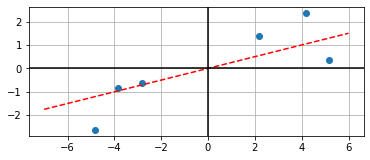

In [4]:
import numpy as np
random_line = np.arange(-7, 7)
y = [i*0.25 for i in random_line]

fig, ax = plt.subplots()
ax.scatter(gene1_shift, gene2_shift, )
ax.plot(random_line, y, '--' , color = 'r', )

ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

With this slope, go 0.97 steps on the x-axis and 0.242 steps on the y-axis will get 1 step in slope line. These 0.97 and 0.242 are the eigenvalue of the PC1. PC2 is perpendicular to PC1. So PC2's eigenvalue are -0.242 and 0.97(see figure below).

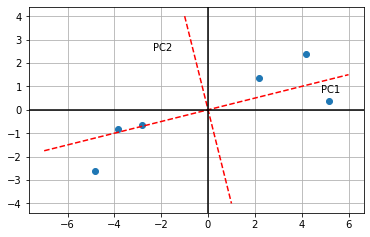

In [5]:
import numpy as np
random_line = np.arange(-7, 7)
y = [i*0.25 for i in random_line]
random_line2 = np.arange(-1, 2)
y2 = [i*-4 for i in random_line2]
# pc2_x = [0, -1]
# pc2_y = [0, 4]


fig, ax = plt.subplots()
ax.scatter(gene1_shift, gene2_shift, )
ax.plot(random_line, y, '--' , color = 'r', )
ax.plot(random_line2, y2, '--' , color = 'r', )
# ax.plot(pc2_x, pc2_y,  '--' , color = 'b', )
ax.set_aspect('equal')
ax.grid(True, which='both')

ax.text(0.9, 0.6, 'PC1', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
ax.text(0.4, 0.8, 'PC2', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Now we calculate the variation for PC1 and PC2  
$$Variation for PC1=\frac{SSD_1}{n-1}$$
$$Variation for PC2=\frac{SSD_2}{n-1}$$
For example, if $VAR_1$ = 15, $VAR_2$ = 3  
$$\frac{15}{18}=0.83=83\%$$
$$\frac{3}{18}=0.17=17\%$$

This 83% stands for the share of PC1 in total. Same for PC2.  
We draw the bar plot. It clearly told us that the PC1 is the Principal Component. And in PC1, gene1(x-axis) is the main feature.

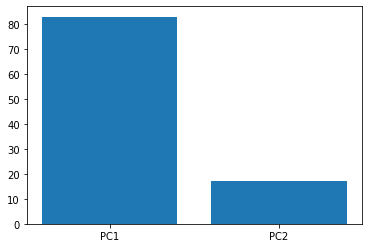

In [6]:
index = ['PC1', 'PC2']
var = [83,17]
plt.bar(index, var, )
plt.show()

Conclusion:
- PCA helps us to do the dimensionality reduction.
- Group the data
- Feature selection